In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import shutil

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
tf.saved_model.save(model, "arbitrary_image_stylization_model")

# Optional: Create a zip file for easy sharing
shutil.make_archive("arbitrary_image_stylization_model", 'zip', "arbitrary_image_stylization_model")

'/content/arbitrary_image_stylization_model.zip'

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img


In [ ]:
content_image = load_image('/content/9ooB60I.jpg')
style_image = load_image('/content/F28w3Ac.jpg')


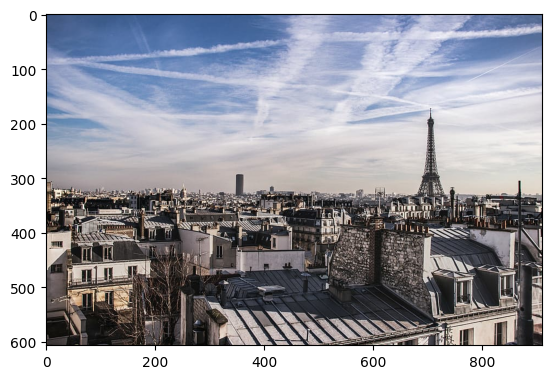

In [ ]:
content_image.shape

plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

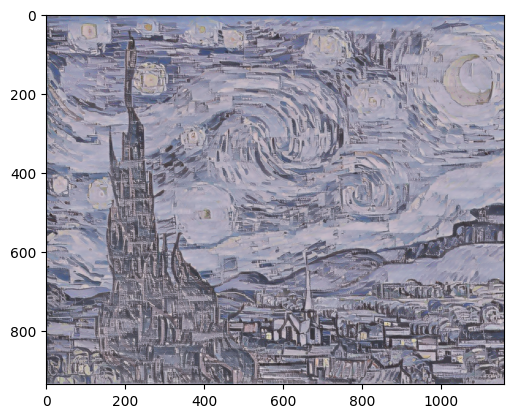

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('stylized_image.jpg', cv2.cvtColor(np.squeeze(stylized_image) * 255, cv2.COLOR_RGB2BGR))

True